最高的分类准确率为98.00% 此时K的值为[15, 19, 21]


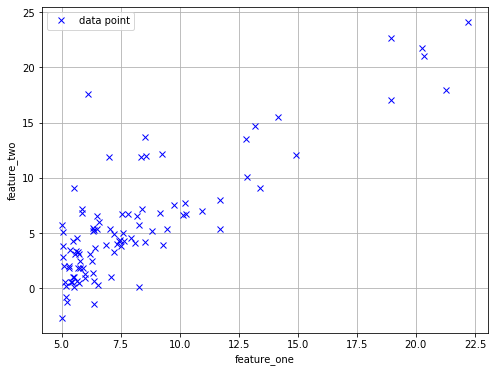

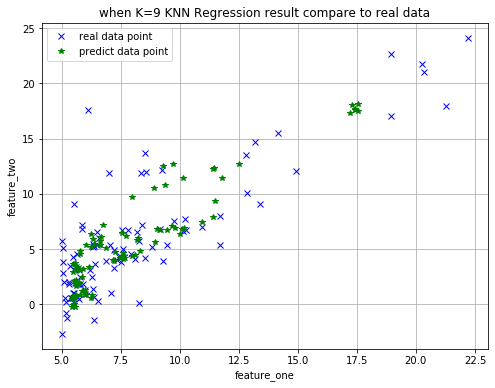

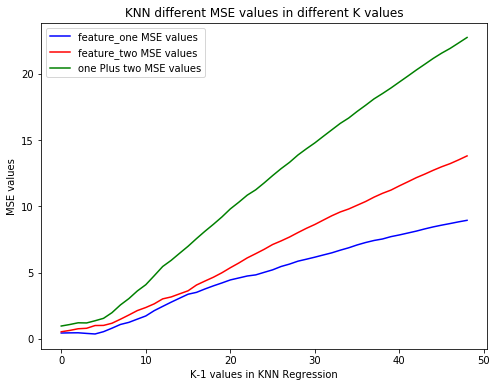

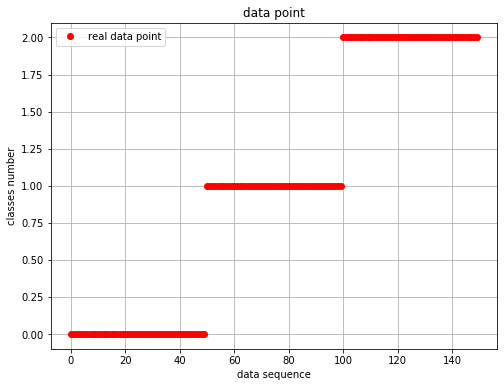

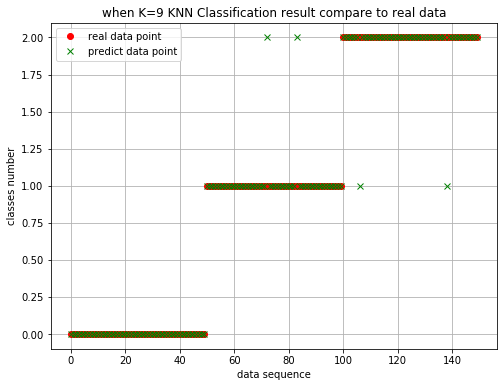

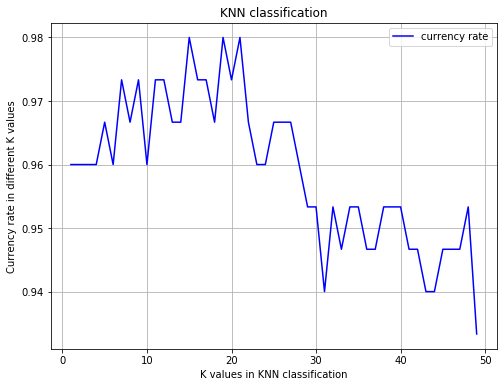

In [70]:
#KNN包含两种，一种是分类，一种是回归
#KNN用作分类依旧使用Iris鸢尾花数据集iris.txt
#KNN用作回归使用线性回归使用的数据集ex1data1.txt
import numpy as np
import matplotlib.pyplot as plt
#首先进行KNN回归
#读取数据
data='data/ex1data1.txt'
cols=np.loadtxt(data,delimiter=',',usecols=(0,1),unpack=True)
cols=np.transpose(cols)
m=cols.shape[0]#数据项大小
n=cols.shape[1]#数据项维度
#print(m)
#print(n)

#观察数据
#print(a)

def plot_data(x):
    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.plot(x[:,0],x[:,1],'bx',label='data point')
    plt.xlabel('feature_one')
    plt.ylabel('feature_two')
    plt.legend()
    
plot_data(cols)
#设置KNN回归中K的值
K=9
#设置欧式距离函数
def Ou_distance(x1,y1,x2,y2):
    return float(np.sqrt((x2-x1)**2+(y2-y1)**2))

def Knn_regression(x,k):
    predict_x=np.zeros((x.shape[0],x.shape[1]))
    for i in range(x.shape[0]):
        a=[]
        for h in range(x.shape[0]):
            a.append(h)
        numx=0
        numy=0#用作求和
        distance=[]
        a.remove(i)
        for j in a:
            distance.append(Ou_distance(x[i][0],x[i][1],x[j][0],x[j][1]))#求出每一个点与当前点的欧式距离
        #找出距离中最小值的索引
        #print(len(distance))
        #print(distance)
        al=list(distance)
        for p in range(k):#总共找出k个值，回归求均值
            min_distance = list(distance)
            min_distance.sort()
            #print(min_distance)
            #print(distance)
            index=al.index(min_distance[0])
            new_index=distance.index(min_distance[0])
            #print(index)
            if(index<i):
                numx=numx+x[index][0]
                numy=numy+x[index][1]
                del distance[new_index]#删除掉最小的，用于下一次寻找第二小的
            else:
                numx=numx+x[index+1][0]
                numy=numy+x[index+1][1]
                del distance[new_index]
        #print(numx)
        #print(numy)
        predict_x[i][0]=float(numx/k)#对该点赋K个最近邻点的均值
        predict_x[i][1]=float(numy/k)
    return predict_x
    
resx=Knn_regression(cols,K)
#print(cols.shape)
#print(resx.shape)
#plot_data(resx)
def plot_compare_res(x1,x2):
        plt.figure(figsize=(8,6))
        plt.grid(True)
        plt.plot(x1[:,0],x1[:,1],'bx',label='real data point')
        plt.plot(x2[:,0],x2[:,1],'g*',label='predict data point')
        plt.xlabel('feature_one')
        plt.ylabel('feature_two')
        plt.title("when K=%s KNN Regression result compare to real data"%K)
        plt.legend()

plot_compare_res(cols,resx)
#plot_data(resx)
#程序测试,设置四个点,测试成功
#test=np.zeros((4,2))
#test[0]=[1,2]
#test[1]=[3,1]
#test[2]=[3,5]
#test[3]=[2,1]
#plot_data(test)

#result = Knn_regression(test,K)
#print(result)
#plot_data(result)
#使用均方误差MSE进行评判回归模型优劣
def MSE(x1,x2):
    n=x1.shape[0]
    mse = sum(np.square(x2-x1))/n
    return mse

#设置不同的K得到不同的均方误差值
K_test=[]
for i in range(50):#由于本数据集中数据项只有
    K_test.append(i)
K_test.remove(0)
def plot_mse(K_test,x):
    mse_all=[]
    mse_plus=np.zeros((len(K_test),1))
    for i in range(len(K_test)):
        px=Knn_regression(x,K_test[i])
        mse_all.append(MSE(x,px))
    plt.figure(figsize=(8,6))
    plt.grid(False)
    mse_all=np.array(mse_all).reshape((len(K_test),x.shape[1]))
    mse_plus=np.sum(mse_all,axis=1)
    #print(mse_plus)
    plt.plot(range(len(K_test)),mse_all[:,0],'b-',label='feature_one MSE values')
    plt.plot(range(len(K_test)),mse_all[:,1],'r-',label='feature_two MSE values')
    plt.plot(range(len(K_test)),mse_plus,'g-',label='one Plus two MSE values')
    plt.xlabel('K-1 values in KNN Regression')
    plt.ylabel('MSE values')
    plt.title('KNN different MSE values in different K values')
    plt.legend()
plot_mse(K_test,cols)   

#进行完KNN回归之后进行KNN分类，使用鸢尾花数据集
datafile='data/iris.txt'
iris = np.loadtxt(datafile,delimiter=',',unpack=True,usecols=(0,1,2,3))
iris_classes=np.loadtxt(datafile,delimiter=',',unpack=True,usecols=(4),dtype='str')
#将字符型类别转换成数字
def transfer_classes(x):
    mask0 = x=='Iris-setosa'
    mask1 = x=='Iris-versicolor'
    mask2 = x=='Iris-virginica'
    x[mask0]='0'
    x[mask1]='1'
    x[mask2]='2'
    x=x.astype(np.float)
    return x
iris_classes=transfer_classes(iris_classes)
iris_classes=np.array(iris_classes)#将字符串类型类别转换为数字类别代替
#print(iris.shape)150x4矩阵，包含维度为4
irises = np.vstack((iris,iris_classes))
irises=np.transpose(irises)
iris = np.transpose(iris)
iris_classes = np.transpose(iris_classes).reshape((iris.shape[0],1))
#print(iris.shape)
#print(iris_classes.shape)

def Ou_d(x,y):
    #编写多维欧几里得距离
    distance = 0
    for i in range(len(x)):
        distance = distance + (y[i]-x[i])**2
    return float(np.square(distance))

#编写求众数函数,输入为一个列表
def getMost(x):
    if len(x)!=0:
        max_num=0
        for a in x:
            num=x.count(a)
            if(num>max_num):
                max_num=num
                max_n = a
        return max_n
    else:
        return 0

#进行KNN分类
Kc=9#设定KNN分类中的K值
def Knn_classesfication(x,y,k):
    predict_y=np.zeros((y.shape[0],1))
    for i in range(x.shape[0]):
        a=[]
        for h in range(x.shape[0]):
            a.append(h)
        numx=[]#用作分类，找众数
        distance=[]
        a.remove(i)
        for j in a:
            distance.append(Ou_d(x[i],x[j]))#求出每一个点与当前点的欧式距离
        #找出距离中最小值的索引
        #print(len(distance))
        #print(distance)
        al=list(distance)
        for p in range(k):#总共找出k个值，回归求均值
            min_distance = list(distance)
            min_distance.sort()
            #print(min_distance)
            #print(distance)
            index=al.index(min_distance[0])
            new_index=distance.index(min_distance[0])
            #print(index)
            if(index<i):
                numx.append(y[index])#将最小距离对应的类别数添加到列表中
                del distance[new_index]#删除掉最小的，用于下一次寻找第二小的
            else:
                numx.append(y[index+1])
                del distance[new_index]
        #print(numx)
        #print(numy)
        predict_y[i]=getMost(numx)#求类别数表中的众数，即出现最多次数的类别
    return predict_y

def plot_compare_classfication(x1,x2):
    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.plot(range(x1.shape[0]),x1,'ro',label='real data point')
    plt.plot(range(x2.shape[0]),x2,'gx',label='predict data point')
    plt.xlabel('data sequence')
    plt.ylabel('classes number')
    plt.title("when K=%s KNN Classification result compare to real data"%Kc)
    plt.legend()

def plot_c(x1):
    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.plot(range(x1.shape[0]),x1,'ro',label='real data point')
    plt.xlabel('data sequence')
    plt.ylabel('classes number')
    plt.title("data point")
    plt.legend()
plot_c(iris_classes)

iris_result = Knn_classesfication(iris,iris_classes,Kc)
plot_compare_classfication(iris_classes,iris_result)

K_ctest=[]
for i in range(50):#由于本数据集中数据项只有
    K_ctest.append(i)
K_ctest.remove(0)
#计算分类准确率的函数，并且通过图像显示不同K值下不同的分类准确率
def compute_rate(x1,x2):
    right = 0
    for i in range(len(x1)):
        if(x1[i]==x2[i]):
            right = right +1
    return right/len(x1)  
#得到列表中指定数值的索引
def get_index(x,value):
    a=[]
    for i in range(len(x)):
        if(x[i]==value):
            a.append(i+1)
    return a
#进行功能测试

def plot_rate():
    rate=[]
    for i in range(len(K_ctest)):
        iris_result = Knn_classesfication(iris,iris_classes,K_ctest[i])
        rate.append(compute_rate(iris_classes,iris_result))
    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.plot(K_ctest,rate,'b-',label='currency rate')
    plt.xlabel('K values in KNN classification')
    plt.ylabel('Currency rate in different K values')
    plt.title('KNN classification')
    plt.legend()
    return rate
rate = plot_rate()

print('最高的分类准确率为{:.2f}% '.format(max(rate)*100)+"此时K的值为%s"%get_index(rate,max(rate)))  